### **Team SuperNovas**
#####Members - TE COMP B
##### Shreya Kakade - 14
##### Apeksha Kamath - 15
##### Yumna Khan - 21
##### Prerak Khandelwal - 22
##### Deep Kothari - 23
##### Payal Kunwar - 29



# Importing dataset and data preprocessing


In [1]:
from google.colab import drive 
drive.mount('/content/drive',force_remount=True)

Mounted at /content/drive


In [2]:
!ls drive/My\ Drive/machine-learning/projects/maintenance

data


In [3]:
%cd drive/My\ Drive/machine-learning/projects/maintenance

/content/drive/My Drive/machine-learning/projects/maintenance


In [4]:
import numpy as np
from numpy import mean
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import StratifiedKFold
from sklearn import preprocessing
from sklearn.metrics import classification_report

import warnings
warnings.filterwarnings('ignore')

from sklearn.dummy import DummyClassifier
from sklearn.model_selection import StratifiedKFold
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.ensemble import BaggingClassifier
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import AdaBoostClassifier
from imblearn.ensemble import BalancedBaggingClassifier
from imblearn.ensemble import EasyEnsembleClassifier
from xgboost import XGBClassifier
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import RandomOverSampler
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import plot_roc_curve
from sklearn.metrics import f1_score
from imblearn.over_sampling import SMOTE

from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import GridSearchCV

from imblearn.pipeline import Pipeline


In [25]:
df = pd.read_csv('./data/maintenance_prediction.csv')

Data exploration

In [6]:
df.shape

(124494, 12)

In [7]:
df.columns

Index(['date', 'device', 'failure', 'metric1', 'metric2', 'metric3', 'metric4',
       'metric5', 'metric6', 'metric7', 'metric8', 'metric9'],
      dtype='object')

In [8]:
df.head()

,date,device,failure,metric1,metric2,metric3,metric4,metric5,metric6,metric7,metric8,metric9
0,1/1/2015,S1F01085,0,215630672,55,0,52,6,407438,0,0,7
1,1/1/2015,S1F0166B,0,61370680,0,3,0,6,403174,0,0,0
2,1/1/2015,S1F01E6Y,0,173295968,0,0,0,12,237394,0,0,0
3,1/1/2015,S1F01JE0,0,79694024,0,0,0,6,410186,0,0,0
4,1/1/2015,S1F01R2B,0,135970480,0,0,0,15,313173,0,0,3


In [9]:
df.describe()

,failure,metric1,metric2,metric3,metric4,metric5,metric6,metric7,metric8,metric9
count,124494.000000,1.244940e+05,124494.000000,124494.000000,124494.000000,124494.000000,124494.000000,124494.000000,124494.000000,124494.000000
mean,0.000851,1.223881e+08,159.492706,9.940897,1.741120,14.222669,260172.657726,0.292528,0.292528,13.013848
std,0.029167,7.045933e+07,2179.677781,185.748131,22.908507,15.943028,99151.078547,7.436924,7.436924,275.661220
min,0.000000,0.000000e+00,0.000000,0.000000,0.000000,1.000000,8.000000,0.000000,0.000000,0.000000
25%,0.000000,6.128476e+07,0.000000,0.000000,0.000000,8.000000,221452.000000,0.000000,0.000000,0.000000
50%,0.000000,1.227974e+08,0.000000,0.000000,0.000000,10.000000,249799.500000,0.000000,0.000000,0.000000
75%,0.000000,1.833096e+08,0.000000,0.000000,0.000000,12.000000,310266.000000,0.000000,0.000000,0.000000
max,1.000000,2.441405e+08,64968.000000,24929.000000,1666.000000,98.000000,689161.000000,832.000000,832.000000,70000.000000


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 124494 entries, 0 to 124493
Data columns (total 12 columns):
 #   Column   Non-Null Count   Dtype 
---  ------   --------------   ----- 
 0   date     124494 non-null  object
 1   device   124494 non-null  object
 2   failure  124494 non-null  int64 
 3   metric1  124494 non-null  int64 
 4   metric2  124494 non-null  int64 
 5   metric3  124494 non-null  int64 
 6   metric4  124494 non-null  int64 
 7   metric5  124494 non-null  int64 
 8   metric6  124494 non-null  int64 
 9   metric7  124494 non-null  int64 
 10  metric8  124494 non-null  int64 
 11  metric9  124494 non-null  int64 
dtypes: int64(10), object(2)
memory usage: 11.4+ MB


Data Preprocessing

In [11]:
df.isnull().sum()

date       0
device     0
failure    0
metric1    0
metric2    0
metric3    0
metric4    0
metric5    0
metric6    0
metric7    0
metric8    0
metric9    0
dtype: int64

# Extracting Date

In [12]:
pd.to_datetime(df["date"], format="%m/%d/%Y").dt.year.unique()

array([2015])

In [13]:
pd.to_datetime(df["date"], format="%m/%d/%Y").dt.day.unique()

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31])

In [14]:
pd.to_datetime(df["date"], format="%m/%d/%Y").dt.month.unique()

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11])

In [26]:
# Extracting months
df["month"] = pd.to_datetime(df["date"], format="%m/%d/%Y").dt.month

In [27]:
df.head()

,date,device,failure,metric1,metric2,metric3,metric4,metric5,metric6,metric7,metric8,metric9,month
0,1/1/2015,S1F01085,0,215630672,55,0,52,6,407438,0,0,7,1
1,1/1/2015,S1F0166B,0,61370680,0,3,0,6,403174,0,0,0,1
2,1/1/2015,S1F01E6Y,0,173295968,0,0,0,12,237394,0,0,0,1
3,1/1/2015,S1F01JE0,0,79694024,0,0,0,6,410186,0,0,0,1
4,1/1/2015,S1F01R2B,0,135970480,0,0,0,15,313173,0,0,3,1


In [18]:
df_fail = df[df['failure']==1]

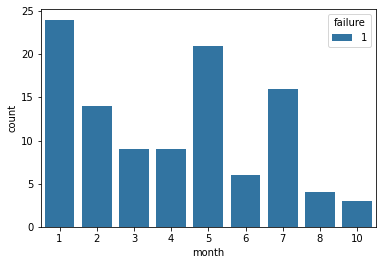

In [21]:
ax = sns.countplot(x="month", hue="failure", data=df_fail)

In [28]:
cols = ["date", "device"]
df.drop(cols, axis=1, inplace=True)

# Visualisation

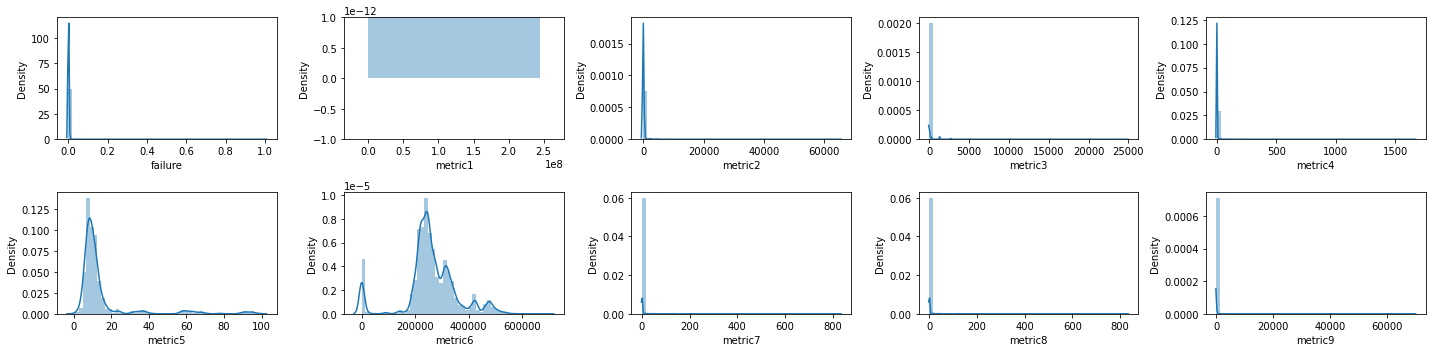

In [29]:
plt.figure(figsize=(20,5))   #2,3,4,7,8,9 highly skewed
plt_num = 1

for col in df.columns:
    if plt_num < 11:
        plt.subplot(2,5,plt_num)
        sns.distplot(df[col])
    plt_num += 1
plt.tight_layout()

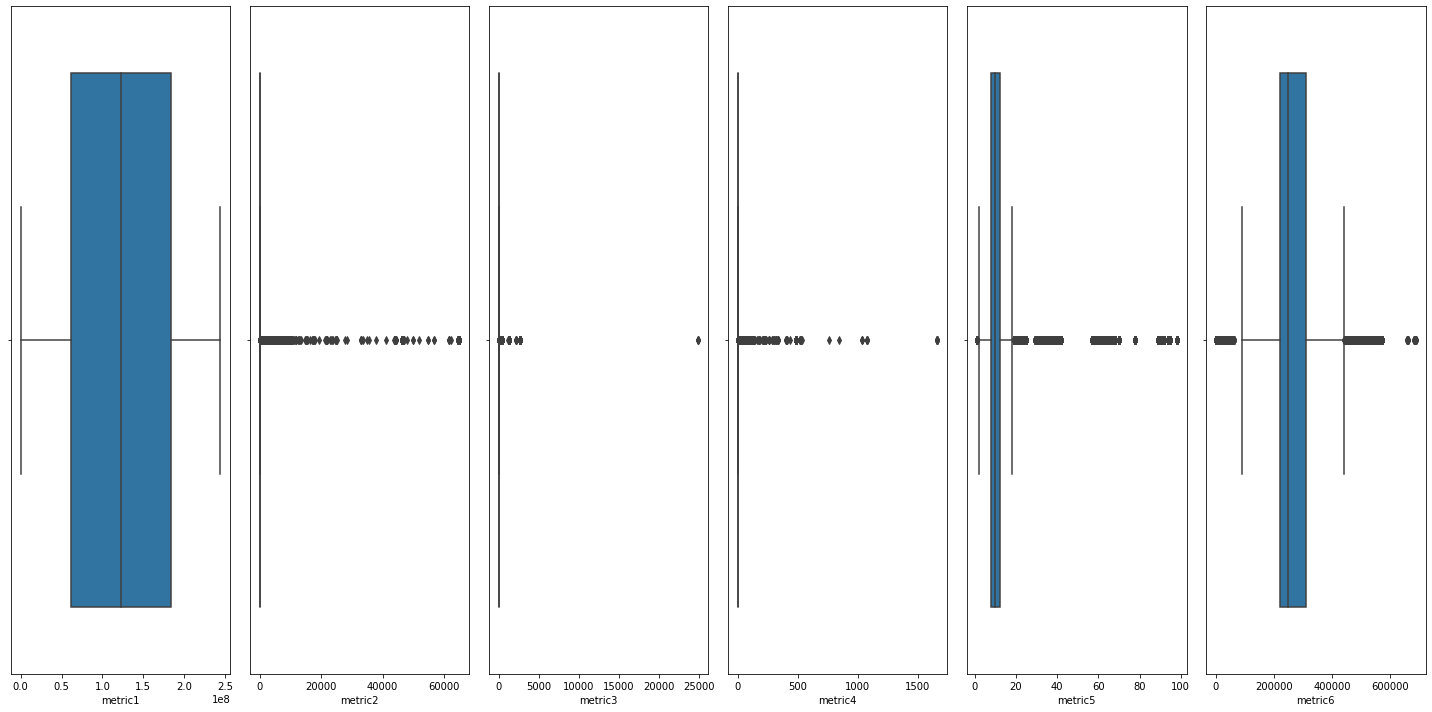

In [30]:
fig = plt.figure(figsize=(20,10))
#
ax1 = plt.subplot(161)
ax2 = plt.subplot(162)
ax3 = plt.subplot(163)
ax4 = plt.subplot(164)
ax5 = plt.subplot(165)
ax6 = plt.subplot(166)

sns.boxplot(x =df['metric1'],ax = ax1)
sns.boxplot(x = df['metric2'],ax = ax2)
sns.boxplot(x = df['metric3'],ax = ax3)
sns.boxplot(x = df['metric4'],ax = ax4)
sns.boxplot(x = df['metric5'],ax = ax5)
sns.boxplot(x =df['metric6'],ax = ax6)

plt.suptitle('')
plt.tight_layout()

Correlation

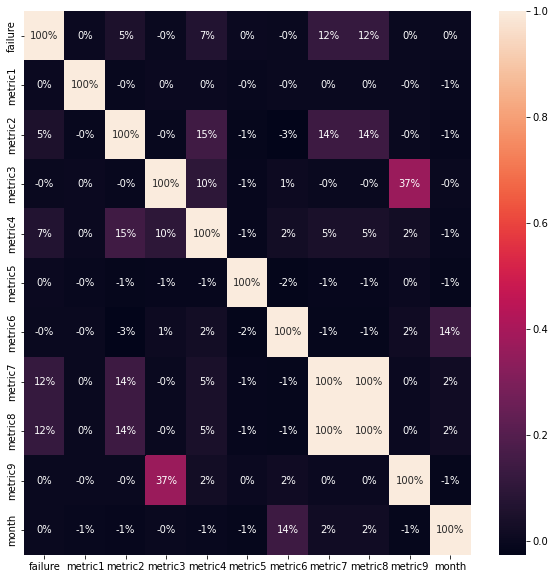

In [31]:
plt.figure(figsize=(10,10))    # metric 7 and 8 show full correlation
sns.heatmap(df.corr(), annot=True, fmt='.0%')

In [32]:
df.drop('metric8', axis=1, inplace=True)

Skewed data transformation

Text(0.5, 1.0, 'Log-Transformed Distribution')

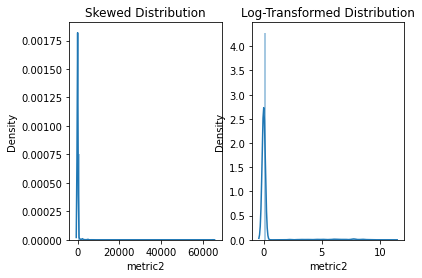

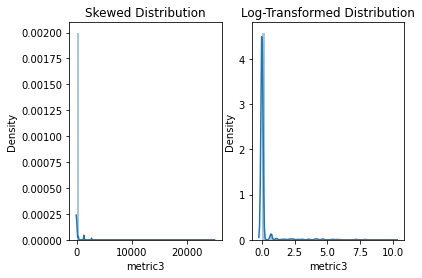

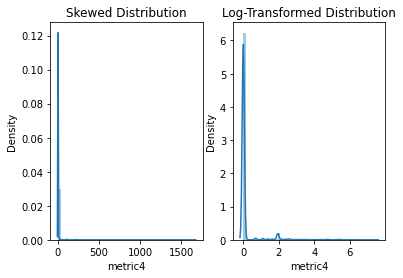

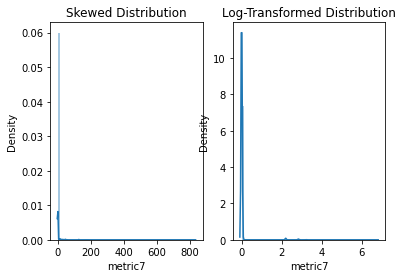

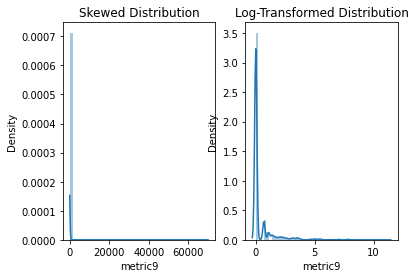

In [33]:
f, ax = plt.subplots(1,2)            # 1 row 2 columns
sns.distplot(df['metric2'],ax=ax[0]) 
ax[0].set_title('Skewed Distribution') 
sns.distplot(np.log(1+df['metric2']),ax=ax[1]) 
ax[1].set_title('Log-Transformed Distribution')

f, ax = plt.subplots(1,2)            # 1 row 2 columns
sns.distplot(df['metric3'],ax=ax[0]) 
ax[0].set_title('Skewed Distribution') 
sns.distplot(np.log(1+df['metric3']),ax=ax[1]) 
ax[1].set_title('Log-Transformed Distribution')

f, ax = plt.subplots(1,2)            # 1 row 2 columns
sns.distplot(df['metric4'],ax=ax[0]) 
ax[0].set_title('Skewed Distribution') 
sns.distplot(np.log(1+df['metric4']),ax=ax[1]) 
ax[1].set_title('Log-Transformed Distribution')

f, ax = plt.subplots(1,2)            # 1 row 2 columns
sns.distplot(df['metric7'],ax=ax[0]) 
ax[0].set_title('Skewed Distribution') 
sns.distplot(np.log(1+df['metric7']),ax=ax[1]) 
ax[1].set_title('Log-Transformed Distribution')

f, ax = plt.subplots(1,2)            # 1 row 2 columns
sns.distplot(df['metric9'],ax=ax[0]) 
ax[0].set_title('Skewed Distribution') 
sns.distplot(np.log(1+df['metric9']),ax=ax[1]) 
ax[1].set_title('Log-Transformed Distribution')

#Outliers

In [ ]:
df_o = df.copy()
df_o

In [88]:
upper_limit = df_o.failure.mean() + 3*df_o.failure.std()
upper_limit

lower_limit = df_o.failure.mean() -3*df_o.failure.std()
lower_limit

-0.08665030620250959

In [89]:
df_o[(df_o.failure>upper_limit) | (df_o.failure<lower_limit)]

,failure,metric1,metric2,metric3,metric4,metric5,metric6,metric7,metric9,day,month
4885,1,48467332,64776,0,841,8,39267,56,1,5,1
6879,1,184069720,528,0,4,9,387871,32,3,7,1
8823,1,136429411,64784,0,406,30,224801,8,0,9,1
11957,1,188251248,2040,0,0,6,39345,32,1,13,1
12668,1,220461296,0,0,0,14,325125,0,0,14,1
...,...,...,...,...,...,...,...,...,...,...,...
109927,1,16043296,88,0,0,9,30,0,0,4,8
114251,1,65654088,0,0,0,9,298592,0,11,18,8
122118,1,13739704,0,0,18,8,343760,0,0,5,10
122808,1,85259320,0,0,164,8,262932,0,0,9,10


In [90]:
df_no_o = df[(df.failure<upper_limit) & (df.failure>lower_limit)]
df_no_o.head()

,failure,metric1,metric2,metric3,metric4,metric5,metric6,metric7,metric9,day,month
0,0,215630672,55,0,52,6,407438,0,7,1,1
1,0,61370680,0,3,0,6,403174,0,0,1,1
2,0,173295968,0,0,0,12,237394,0,0,1,1
3,0,79694024,0,0,0,6,410186,0,0,1,1
4,0,135970480,0,0,0,15,313173,0,3,1,1


In [91]:
df_no_o.shape

(124388, 11)

In [ ]:
df_z = df.copy()

# Outliers(z-score)

In [ ]:
from scipy import stats
df_z = df.copy()
df_z

In [118]:
df_z.shape

(124494, 12)

In [119]:
z=np.abs(stats.zscore(df['metric2']))
print(z)
threshold=3
print(np.where(z>3))
df_1=df[(z< 3)]
print(df_1)

[0.04793971 0.0731729  0.0731729  ... 2.14367743 0.0731729  0.0731729 ]
(array([    45,     52,     60,    128,    263,    331,    368,    648,
          842,   1029,   1208,   1215,   1223,   1291,   1398,   1426,
         1494,   1531,   1811,   2005,   2192,   2371,   2378,   2386,
         2454,   2561,   2589,   2657,   2868,   2974,   3168,   3355,
         3534,   3541,   3549,   3617,   3724,   3752,   3820,   3857,
         4031,   4137,   4330,   4517,   4695,   4702,   4710,   4739,
         4778,   4885,   4913,   4981,   5018,   5192,   5298,   5491,
         5678,   5874,   5910,   6037,   6105,   6142,   6308,   6404,
         6592,   6749,   6897,   7012,   7070,   7107,   7303,   7442,
         7694,   7799,   7849,   8067,   8198,   8450,   8555,   8605,
         8823,   8954,   9206,   9311,   9361,   9709,   9961,  10066,
        10116,  10464,  10716,  10821,  10871,  11219,  11471,  11576,
        11626,  11974,  12226,  12690,  12942,  13405,  13657,  14120,
    

In [120]:
z=np.abs(stats.zscore(df_1['metric3']))
print(z)
threshold=3
print(np.where(z>3))
df_2=df_1[(z< 3)]
print(df_2)

[0.05353632 0.03741358 0.05353632 ... 0.05353632 0.05353632 0.05353632]
(array([    27,     66,    258,    347,   1180,   1219,   1410,   1499,
         2332,   2371,   2562,   2651,   3484,   3523,   3714,   3803,
         4672,   4862,   4951,   5977,   6066,   6944,   7023,   7725,
         7788,   8476,   8539,   9227,   9290,   9978,  10041,  10729,
        10792,  11480,  11543,  12227,  12274,  12941,  12988,  13654,
        13701,  14367,  14414,  15080,  15127,  15792,  15839,  16503,
        16550,  17214,  17261,  17925,  17972,  18636,  18683,  19348,
        19395,  20059,  20106,  20770,  20817,  21480,  21527,  22190,
        22237,  22900,  22947,  23613,  23660,  24323,  24370,  25033,
        25080,  25742,  25789,  26451,  26499,  27161,  27209,  27872,
        27921,  28582,  28631,  29291,  29340,  30001,  30050,  30711,
        30760,  31421,  31470,  32131,  32180,  32841,  32890,  33551,
        33600,  34261,  34310,  34970,  35019,  35679,  35728,  36388,
    

In [121]:
z=np.abs(stats.zscore(df_2['metric4']))
print(z)
threshold=3
print(np.where(z>3))
df_3=df_2[(z< 3)]
print(df_3)

[3.16870751 0.09192475 0.09192475 ... 0.09192475 0.09192475 0.09192475]
(array([     0,     13,     14,     15,    265,    273,    531,    825,
          884,   1149,   1162,   1163,   1164,   1413,   1421,   1679,
         1973,   2032,   2297,   2310,   2311,   2312,   2561,   2569,
         2654,   3121,   3180,   3445,   3458,   3459,   3460,   3709,
         3717,   4267,   4326,   4591,   4604,   4605,   4606,   4854,
         4862,   5412,   5471,   5736,   5749,   5750,   5751,   5762,
         5967,   5975,   6502,   6555,   6932,   6940,   7343,   7392,
         7708,   7714,   8092,   8141,   8457,   8463,   8841,   8890,
         9206,   9212,   9590,   9639,   9955,   9961,  10339,  10388,
        10704,  10710,  11069,  11088,  11137,  11250,  11453,  11459,
        11818,  11837,  11886,  11999,  12198,  12204,  12531,  12549,
        12598,  12711,  12910,  12916,  13243,  13260,  13309,  13422,
        13621,  13627,  13954,  13971,  14020,  14133,  14332,  14338,
    

In [122]:
z=np.abs(stats.zscore(df_3['metric5']))
print(z)
threshold=3
print(np.where(z>3))
df_4=df_3[(z< 3)]
print(df_4)

[0.51491241 0.14069681 0.51491241 ... 0.20306608 0.14069681 0.26543534]
(array([    75,     78,     84, ..., 111046, 111047, 111048]),)
        failure    metric1  metric2  metric3  ...  metric8  metric9  day  month
1             0   61370680        0        3  ...        0        0    1      1
2             0  173295968        0        0  ...        0        0    1      1
3             0   79694024        0        0  ...        0        0    1      1
4             0  135970480        0        0  ...        0        3    1      1
5             0   68837488        0        0  ...        0        1    1      1
...         ...        ...      ...      ...  ...      ...      ...  ...    ...
124489        0   18310224        0        0  ...        8        0    2     11
124490        0  172556680       96      107  ...        0       13    2     11
124491        0   19029120     4832        0  ...        0        0    2     11
124492        0  226953408        0        0  ...        0      

In [123]:
z=np.abs(stats.zscore(df_4['metric6']))
print(z)
threshold=3
print(np.where(z>3))
df_5=df_4[(z< 3)]
print(df_5)

[1.405499   0.23058218 1.47470035 ... 0.8847716  0.96934885 0.89484784]
(array([  516,  1632,  2748,  3864,  4978,  6051,  6949,  8401,  9123,
        9845, 10567, 11287, 11985, 12668, 13350, 14032, 14714, 15395,
       16078, 16760, 17441, 18122, 18805, 19487, 20169, 20850, 21530,
       22214, 22897, 23579, 24261, 24941, 25622, 26303, 26986, 27667,
       28347, 29028, 29709, 30390, 31071, 31752, 32433, 33113, 33793,
       34473, 35153, 35809, 36452, 37095, 37738, 74257, 74260, 74261,
       74262, 74635, 74638, 74639, 74640, 75014, 75017, 75018, 75019,
       75392, 75395, 75396, 75397, 75772, 75775, 75776, 75777, 76151,
       76154, 76155, 76156]),)
        failure    metric1  metric2  metric3  ...  metric8  metric9  day  month
1             0   61370680        0        3  ...        0        0    1      1
2             0  173295968        0        0  ...        0        0    1      1
3             0   79694024        0        0  ...        0        0    1      1
4             0 

In [124]:
z=np.abs(stats.zscore(df_5['metric7']))
print(z)
threshold=3
print(np.where(z>3))
df_6=df_5[(z< 3)]
print(df_6)

[0.0313883 0.0313883 0.0313883 ... 0.0313883 0.0313883 0.0313883]
(array([    47,     55,     58,    216,    951,    955,   1103,   1163,
         1171,   1174,   2066,   2070,   2218,   2278,   2286,   2289,
         3181,   3185,   3333,   3393,   3401,   3404,   4295,   4299,
         4447,   4507,   4515,   4518,   5408,   5412,   5560,   5612,
         6570,   6596,   7117,   7336,   7839,   8058,   8560,   8779,
         9281,   9432,   9500,  10002,  10153,  10221,  10722,  10873,
        10940,  11441,  11592,  11659,  12274,  12341,  12955,  13022,
        13636,  13703,  14317,  14384,  14997,  15064,  15132,  15379,
        15677,  15744,  16061,  17531,  18212,  19461,  19759,  20142,
        20440,  20822,  21120,  21800,  22484,  23165,  23846,  24525,
        25203,  25666,  25883,  26563,  33990,  34669,  35348,  35992,
        36634,  57717,  58319,  58861,  59387,  59846,  60303,  60760,
        61217,  61427,  61674,  61884,  62131,  62341,  62588,  62798,
        63

In [125]:
z=np.abs(stats.zscore(df_6['metric9']))
print(z)
threshold=3
print(np.where(z>3))
df_7=df_6[(z< 3)]
print(df_7)

[3.30195648e-02 3.30195648e-02 3.30195648e-02 ... 3.30195648e-02
 3.30195648e-02 2.70497296e+02]
(array([    11,    157,    222,    342,    500,    910,   1059,   1092,
         1120,   1266,   1331,   1451,   1609,   2019,   2168,   2201,
         2229,   2375,   2440,   2560,   2718,   3128,   3277,   3310,
         3338,   3484,   3549,   3669,   3827,   4236,   4385,   4418,
         4446,   4591,   4656,   4776,   4934,   5343,   5492,   5525,
         5553,   5667,   5732,   5852,   6002,   6386,   6667,   6777,
         7181,   7420,   7506,   7901,   8140,   8226,   8620,   8859,
         8945,   9339,   9577,   9663,  10057,  10295,  10381,  10774,
        11011,  11097,  11490,  11726,  11792,  12170,  12406,  12472,
        12849,  13085,  13151,  13528,  13764,  13830,  14207,  14443,
        14509,  14885,  15120,  15186,  15561,  15797,  15862,  15991,
        16239,  16477,  16542,  16671,  16919,  17157,  17222,  17351,
        17598,  17836,  17901,  18030,  18278,  18

# Target variable analysis

In [34]:
df['failure'].value_counts()       #This shows our data is highly imbalanced

0    124388
1       106
Name: failure, dtype: int64

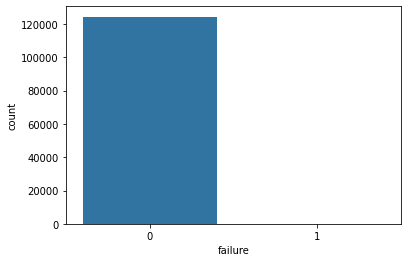

In [35]:
sns.countplot(df['failure'])

# Splitting dataset

In [37]:
X_o = df.iloc[:, 1:]
y = df['failure']

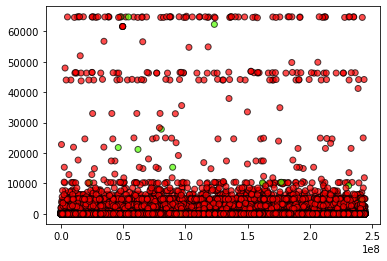

In [38]:
plt.scatter(X_o.iloc[:, 0], X_o.iloc[:, 1], c=y, cmap=plt.cm.prism, edgecolor='k', alpha=0.7)
plt.show()

# MinMaxScaler

In [39]:
norm = preprocessing.MinMaxScaler()
X = norm.fit_transform(X_o)
X

array([[8.83223757e-01, 8.46570619e-04, 0.00000000e+00, ...,
        0.00000000e+00, 1.00000000e-04, 0.00000000e+00],
       [2.51374455e-01, 0.00000000e+00, 1.20341771e-04, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [7.09820707e-01, 0.00000000e+00, 0.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       ...,
       [7.79433218e-02, 7.43750770e-02, 0.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 1.00000000e+00],
       [9.29601711e-01, 0.00000000e+00, 0.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 1.00000000e+00],
       [7.19783954e-02, 0.00000000e+00, 0.00000000e+00, ...,
        0.00000000e+00, 1.00000000e+00, 1.00000000e+00]])

In [40]:
X = pd.DataFrame(X)
X.columns = X_o.columns
X.head()

,metric1,metric2,metric3,metric4,metric5,metric6,metric7,metric9,month
0,0.883224,0.000847,0.00000,0.031212,0.051546,0.591204,0.0,0.000100,0.0
1,0.251374,0.000000,0.00012,0.000000,0.051546,0.585017,0.0,0.000000,0.0
2,0.709821,0.000000,0.00000,0.000000,0.113402,0.344461,0.0,0.000000,0.0
3,0.326427,0.000000,0.00000,0.000000,0.051546,0.595191,0.0,0.000000,0.0
4,0.556935,0.000000,0.00000,0.000000,0.144330,0.454420,0.0,0.000043,0.0


# Defining models

#Combination(Under sampling and Over sampling)

In [41]:
# define model
model = BalancedBaggingClassifier()
# define pipeline
over = RandomOverSampler(sampling_strategy=0.1)
under = RandomUnderSampler(sampling_strategy=0.5)
steps = [('o', over), ('u', under), ('m', model)]
pipeline = Pipeline(steps=steps)
# define evaluation procedure
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
for train_index,test_index in cv.split(X, y):
        X_train, X_test = X.iloc[train_index], X.iloc[test_index]
        y_train, y_test = y.iloc[train_index], y.iloc[test_index]

        model.fit(X_train,y_train)
        
        p = model.predict(X_test)
        y_pred = p.tolist()
# evaluate model
scores = cross_val_score(pipeline, X, y, scoring='roc_auc', cv=cv, n_jobs=-1)
# summarize performance
print('Mean ROC AUC: %.3f' % mean(scores))

Mean ROC AUC: 0.690


              precision    recall  f1-score   support

           0       1.00      0.90      0.94     12438
           1       0.01      0.64      0.01        11

    accuracy                           0.90     12449
   macro avg       0.50      0.77      0.48     12449
weighted avg       1.00      0.90      0.94     12449



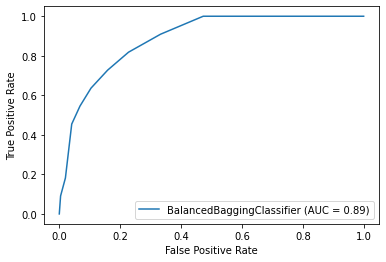

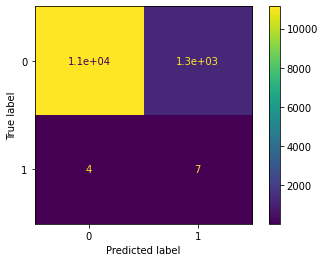

In [42]:
#bbc
plot_roc_curve(model, X_test, y_test )
plot_confusion_matrix(model, X_test,y_test)
print(classification_report(y_test,y_pred))

In [44]:
print(model.predict([['184069720','528','0','4','9','387871','32','3','7']])) #1

[1]


In [45]:
print(model.predict([['22525880','0','0','0','5','236466','0','0','7']])) #0

[0]


# Bagging/Boosting Algorithms

In [46]:
adaboost = AdaBoostClassifier(n_estimators=100, base_estimator= None,learning_rate=1, random_state = 1)
cb_model = BaggingClassifier()
bbc_model = BalancedBaggingClassifier(n_estimators=10,base_estimator =AdaBoostClassifier())
eec_model = EasyEnsembleClassifier(n_estimators =10)


In [47]:
def train_model1(X, y, model):
    score = 0
    splits = 5
    skf = StratifiedKFold(n_splits=splits)

    for train_index,test_index in skf.split(X, y):
        X_train, X_test = X.iloc[train_index], X.iloc[test_index]
        y_train, y_test = y.iloc[train_index], y.iloc[test_index]

        model.fit(X_train,y_train)
        
        p = model.predict(X_test)
        y_pred = p.tolist()
        score = score + model.score(X_test,y_test)

    print('Mean Accuracy = ', score/splits)
    plot_roc_curve(model, X_test, y_test )
    plot_confusion_matrix(model, X_test,y_test)
    print(classification_report(y_test,y_pred))

Mean Accuracy =  0.994690535303634
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     24877
           1       0.00      0.00      0.00        21

    accuracy                           1.00     24898
   macro avg       0.50      0.50      0.50     24898
weighted avg       1.00      1.00      1.00     24898



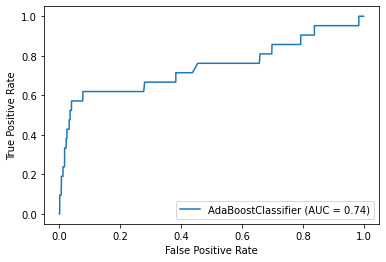

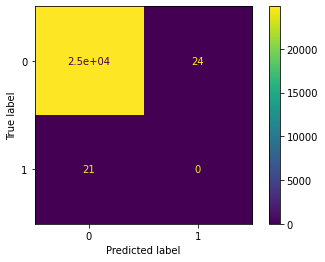

In [48]:
train_model1(X,y,adaboost)

In [56]:
print(adaboost.predict([['184069720','528','0','4','9','387871','32','3','7']])) #1

[0]


In [57]:
print(adaboost.predict([['22525880','0','0','0','5','236466','0','0','7']])) #0

[0]


Mean Accuracy =  0.9984497243552684
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     24877
           1       0.00      0.00      0.00        21

    accuracy                           1.00     24898
   macro avg       0.50      0.50      0.50     24898
weighted avg       1.00      1.00      1.00     24898



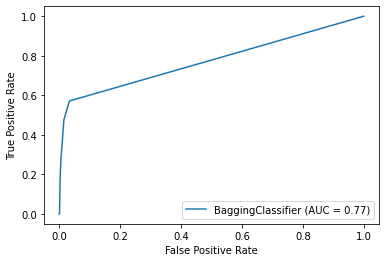

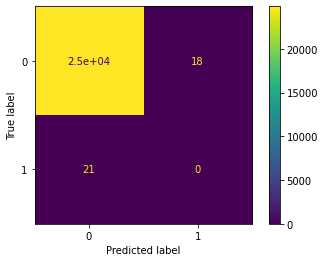

In [53]:
train_model1(X,y,cb_model)

In [58]:
print(cb_model.predict([['184069720','528','0','4','9','387871','32','3','7']])) #1

[1]


In [59]:
print(cb_model.predict([['22525880','0','0','0','5','236466','0','0','7']])) #0

[0]


Mean Accuracy =  0.7067258870184489
              precision    recall  f1-score   support

           0       1.00      0.84      0.91     24877
           1       0.00      0.76      0.01        21

    accuracy                           0.84     24898
   macro avg       0.50      0.80      0.46     24898
weighted avg       1.00      0.84      0.91     24898



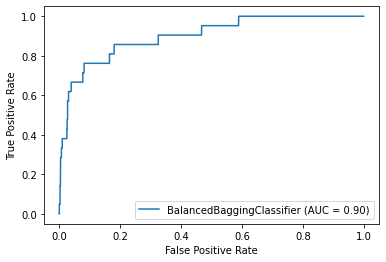

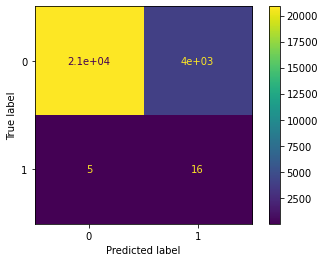

In [61]:
train_model1(X,y,bbc_model)

In [64]:
print(bbc_model.predict([['184069720','528','0','4','9','387871','32','3','7']])) #1

[1]


In [65]:
print(bbc_model.predict([['22525880','0','0','0','5','236466','0','0','7']])) #0

[1]


Mean Accuracy =  0.6453016721412648
              precision    recall  f1-score   support

           0       1.00      0.83      0.91     24877
           1       0.00      0.76      0.01        21

    accuracy                           0.83     24898
   macro avg       0.50      0.80      0.46     24898
weighted avg       1.00      0.83      0.91     24898



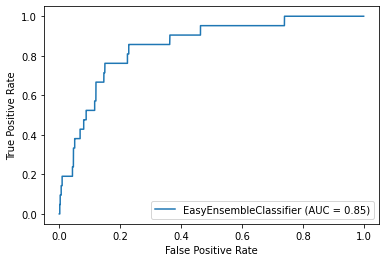

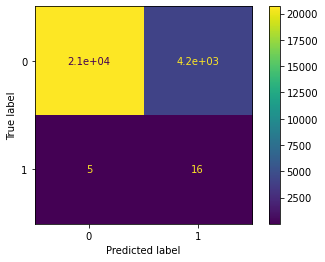

In [66]:
train_model1(X,y,eec_model)

In [67]:
print(eec_model.predict([['184069720','528','0','4','9','387871','32','3','7']])) #1

[1]


In [68]:
print(eec_model.predict([['22525880','0','0','0','5','236466','0','0','7']])) #0

[1]


#Stratified KFold and oversampling

In [69]:
ros = RandomOverSampler(random_state=42)
oversample = SMOTE()

In [70]:
def train_model_ros(X, y, model):
    score = 0
    splits = 5
    skf = StratifiedKFold(n_splits=splits)

    for train_index,test_index in skf.split(X, y):
        X_train, X_test = X.iloc[train_index], X.iloc[test_index]
        y_train, y_test = y.iloc[train_index], y.iloc[test_index]

        X_train_os, y_train_os = ros.fit_sample(X_train, y_train)
        model.fit(X_train_os, y_train_os)
        
        p = model.predict(X_test)
        y_pred = p.tolist()
        score = score + model.score(X_test,y_test)

    print('Mean Accuracy = ', score/splits)
    plot_roc_curve(model, X_test, y_test )
    plot_confusion_matrix(model, X_test,y_test)
    print(classification_report(y_test,y_pred))

In [72]:
def train_model_os(X, y, model):
    score = 0
    splits = 5
    skf = StratifiedKFold(n_splits=splits)

    for train_index,test_index in skf.split(X, y):
        X_train, X_test = X.iloc[train_index], X.iloc[test_index]
        y_train, y_test = y.iloc[train_index], y.iloc[test_index]

        X_train_o, y_train_o = oversample.fit_sample(X_train, y_train)
        model.fit(X_train_o, y_train_o)
        
        p = model.predict(X_test)
        y_pred = p.tolist()
        score = score + model.score(X_test,y_test)

    print('Mean Accuracy = ', score/splits)
    plot_roc_curve(model, X_test, y_test )
    plot_confusion_matrix(model, X_test,y_test)
    print(classification_report(y_test,y_pred))

Defining Models

In [73]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
base_model = DummyClassifier(strategy='constant', constant=1)
log_reg_model = LogisticRegression(solver='newton-cg')
dt_model = DecisionTreeClassifier()
gbc = GradientBoostingClassifier()
k=KNeighborsClassifier()
rf_model = RandomForestClassifier(n_estimators=10)

#Base Model

Mean Accuracy =  0.0008514465917606349
              precision    recall  f1-score   support

           0       0.00      0.00      0.00     24877
           1       0.00      1.00      0.00        21

    accuracy                           0.00     24898
   macro avg       0.00      0.50      0.00     24898
weighted avg       0.00      0.00      0.00     24898



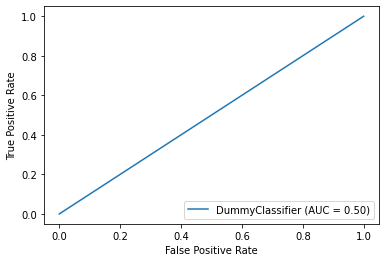

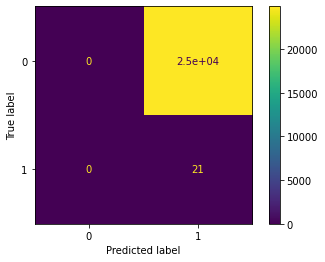

In [75]:
#ros
train_model_ros(X, y, base_model)

Mean Accuracy =  0.0008514465917606349
              precision    recall  f1-score   support

           0       0.00      0.00      0.00     24877
           1       0.00      1.00      0.00        21

    accuracy                           0.00     24898
   macro avg       0.00      0.50      0.00     24898
weighted avg       0.00      0.00      0.00     24898



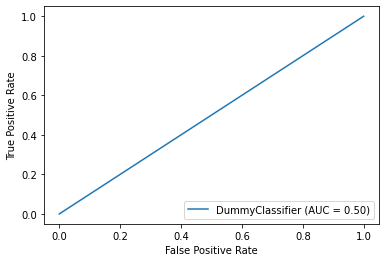

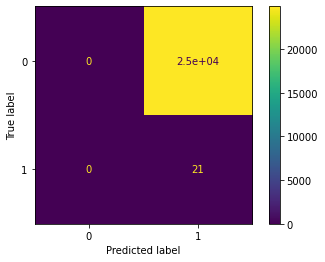

In [77]:
#os
train_model_os(X, y, base_model)

# Balanced Bagging Classifier

Mean Accuracy =  0.7470089606221522
              precision    recall  f1-score   support

           0       1.00      0.88      0.94     24877
           1       0.00      0.57      0.01        21

    accuracy                           0.88     24898
   macro avg       0.50      0.73      0.47     24898
weighted avg       1.00      0.88      0.94     24898



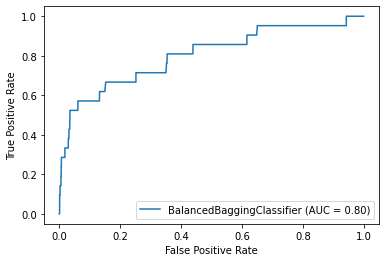

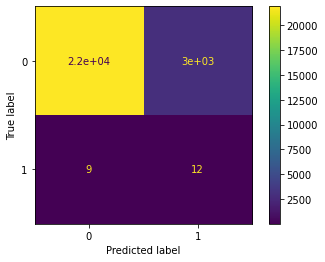

In [78]:
#ros
train_model_ros(X,y,bbc_model)

In [79]:
print(bbc_model.predict([['184069720','528','0','4','9','387871','32','3','7']])) #1

[1]


In [80]:
print(bbc_model.predict([['22525880','0','0','0','5','236466','0','0','7']])) #0

[0]


# K Neighbours Classifier

Mean Accuracy =  0.9629542751866065
              precision    recall  f1-score   support

           0       1.00      0.99      1.00     24877
           1       0.01      0.05      0.01        21

    accuracy                           0.99     24898
   macro avg       0.50      0.52      0.50     24898
weighted avg       1.00      0.99      1.00     24898



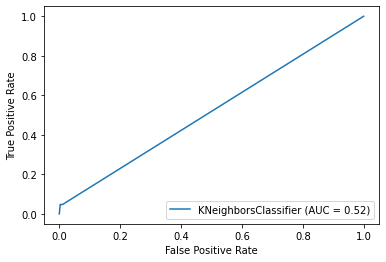

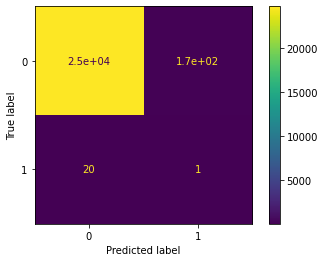

In [85]:
#ros
train_model_ros(X,y,k)

In [87]:
print(k.predict([['184069720','528','0','4','9','387871','32','3','7']])) #1

[0]


In [88]:
print(k.predict([['22525880','0','0','0','5','236466','0','0','7']])) #0

[0]


Mean Accuracy =  0.8436884025036535
              precision    recall  f1-score   support

           0       1.00      0.99      0.99     24877
           1       0.01      0.10      0.01        21

    accuracy                           0.99     24898
   macro avg       0.50      0.54      0.50     24898
weighted avg       1.00      0.99      0.99     24898



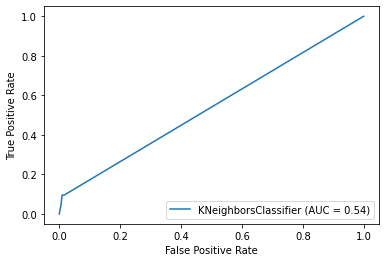

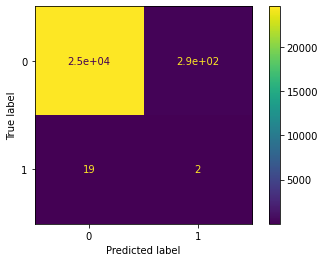

In [86]:
#os
train_model_os(X,y,k)

Mean Accuracy =  0.9808421556867559
              precision    recall  f1-score   support

         0.0       1.00      0.94      0.97     24877
         1.0       0.00      0.05      0.00        21

    accuracy                           0.94     24898
   macro avg       0.50      0.50      0.49     24898
weighted avg       1.00      0.94      0.97     24898



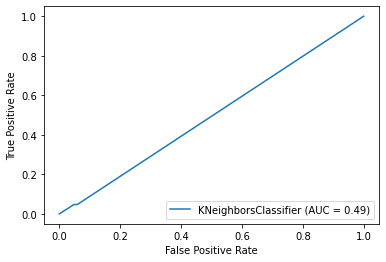

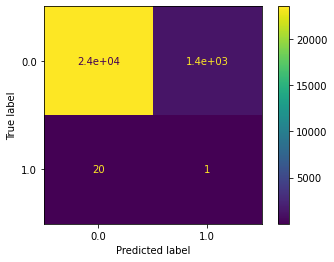

In [96]:
#outlier-std dev
train_model(X,y,k)

Mean Accuracy =  0.9956865369799509
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00     24877
         1.0       0.02      0.10      0.03        21

    accuracy                           1.00     24898
   macro avg       0.51      0.55      0.52     24898
weighted avg       1.00      1.00      1.00     24898



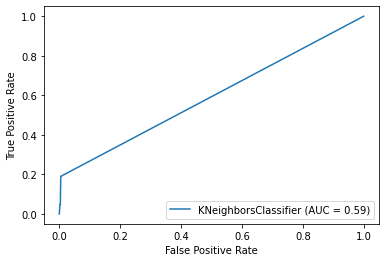

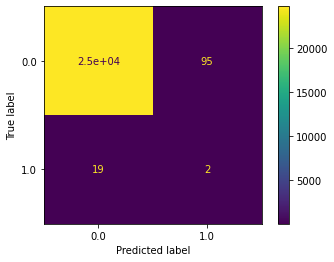

In [84]:
#outliers-z score
train_model(X,y,k)

In [85]:
print(k.predict([['48467332','64776','0','841','8','39267','56','1','1','5']])) #1

[0.]


In [86]:
print(k.predict([['23951072','0','0','0','5','243825','0','0','1','7']])) #0

[0.]


# Logistic Regression

Mean Accuracy =  0.8205653621577433
              precision    recall  f1-score   support

           0       1.00      0.28      0.44     24877
           1       0.00      0.90      0.00        21

    accuracy                           0.28     24898
   macro avg       0.50      0.59      0.22     24898
weighted avg       1.00      0.28      0.44     24898



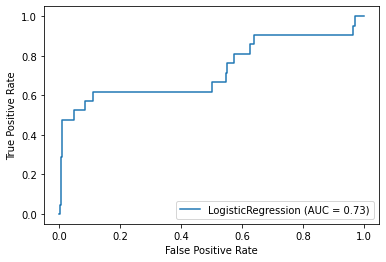

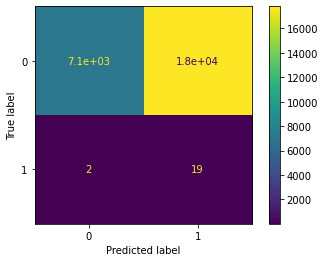

In [89]:
#ros
train_model_ros(X, y, log_reg_model)

Mean Accuracy =  0.833031772079984
              precision    recall  f1-score   support

           0       1.00      0.29      0.45     24877
           1       0.00      0.90      0.00        21

    accuracy                           0.29     24898
   macro avg       0.50      0.60      0.23     24898
weighted avg       1.00      0.29      0.45     24898



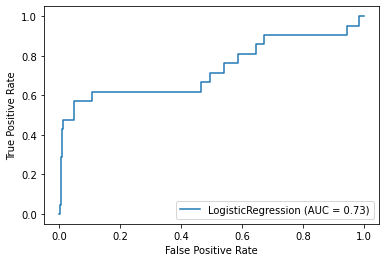

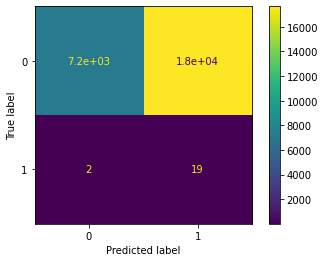

In [90]:
#os
train_model_os(X, y, log_reg_model)

# Gradient Boosting Classifier

Mean Accuracy =  0.8679219429255861
              precision    recall  f1-score   support

         0.0       1.00      0.94      0.97     24877
         1.0       0.01      0.62      0.02        21

    accuracy                           0.94     24898
   macro avg       0.50      0.78      0.49     24898
weighted avg       1.00      0.94      0.97     24898



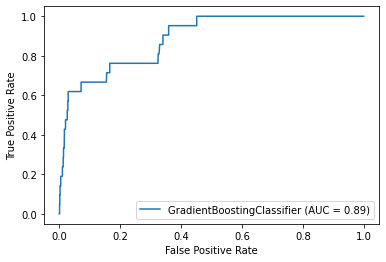

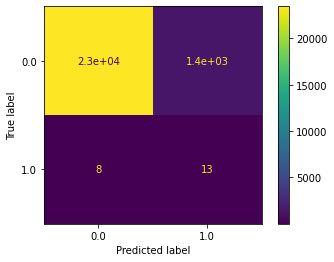

In [67]:
train_model(X,y,gbc)

In [68]:
print(gbc.predict([['48467332','64776','0','841','8','39267','56','1','1','5']])) #1

[0.]


In [70]:
print(gbc.predict([['184069720','528','0','4','9','387871','32','3','1','7']])) #1

[1.]


# Decision Tree Classifier

Mean Accuracy =  0.989059770627484
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     24877
           1       0.04      0.14      0.06        21

    accuracy                           1.00     24898
   macro avg       0.52      0.57      0.53     24898
weighted avg       1.00      1.00      1.00     24898



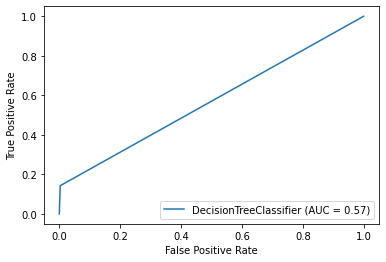

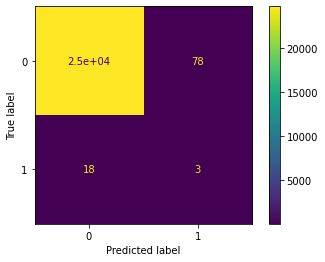

In [91]:
#ros
train_model_ros(X, y, dt_model)

Mean Accuracy =  0.9806336439282175
              precision    recall  f1-score   support

           0       1.00      0.99      0.99     24877
           1       0.01      0.24      0.03        21

    accuracy                           0.99     24898
   macro avg       0.51      0.61      0.51     24898
weighted avg       1.00      0.99      0.99     24898



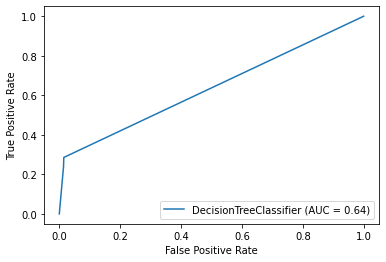

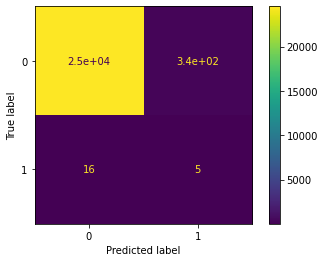

In [96]:
#os
train_model_os(X,y,dt_model)

In [93]:
print(dt_model.predict([['48467332','64776','0','841','8','39267','56','1','5']])) #1

[0]


In [95]:
print(dt_model.predict([['22525880','0','0','0','5','236466','0','0','7']])) #0

[0]


# Hyperparameter tuning 

In [ ]:
model = BalancedBaggingClassifier()
splits = 5
skf = StratifiedKFold(n_splits=splits)

for train_index,test_index in skf.split(X, y):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

model.fit(X_train,y_train)

n_estimators = [10,100,1000]
# define grid search
grid = dict(n_estimators=n_estimators)
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
grid_search = GridSearchCV(estimator=BalancedBaggingClassifier(), param_grid=grid, n_jobs=-1, cv=cv, scoring='accuracy',error_score=0)
# summarize results
grid_result = grid_search.fit(X_train, y_train)
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Best: 0.900963 using {'n_estimators': 10}
0.900963 (0.011388) with: {'n_estimators': 10}
0.899042 (0.007479) with: {'n_estimators': 100}
0.898426 (0.006441) with: {'n_estimators': 1000}


In [97]:
model = BalancedBaggingClassifier(n_estimators=10)

Mean Accuracy =  0.8638243856614573
              precision    recall  f1-score   support

           0       1.00      0.82      0.90     24877
           1       0.00      0.81      0.01        21

    accuracy                           0.82     24898
   macro avg       0.50      0.81      0.45     24898
weighted avg       1.00      0.82      0.90     24898



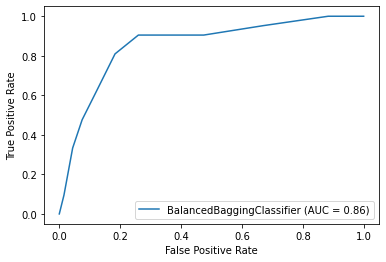

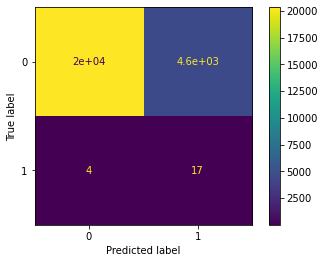

In [98]:
train_model1(X,y,model)

# Inferences

In [100]:
from IPython.display import display 
 
dict = {'Model' : ['BalancedBaggingClassifier(ROS + RUS)','BalancedBoosting','BalancedBaggingClassifier(ROS)','KNeighboursClassifier(ROS)','KNeighboursClassifier(OS)','KNeighboursClassifier(std-dev)','KNeighboursClassifier(z-score)','DecisionTreeClassifier(ROS)','DecisionTreeClassifier(OS)'], 

        'Accuracy' : [90,99.84,88,96.3,84.36,98.08,99.56,98.9,98.06],
        'Recall':[0.77,0.50,0.73,0.54,0.52,0.50,0.55,0.57,0.61],
        'FN':[1300,18,3000,170,290,1400,95,78,340],
        'FP':[4,21,9,20,19,20,19,18,16]
        }
df = pd.DataFrame(dict)  
display(df)

,Model,Accuracy,Recall,FN,FP
0,BalancedBaggingClassifier(ROS + RUS),90.00,0.77,1300,4
1,BalancedBoosting,99.84,0.50,18,21
2,BalancedBaggingClassifier(ROS),88.00,0.73,3000,9
3,KNeighboursClassifier(ROS),96.30,0.54,170,20
4,KNeighboursClassifier(OS),84.36,0.52,290,19
5,KNeighboursClassifier(std-dev),98.08,0.50,1400,20
6,KNeighboursClassifier(z-score),99.56,0.55,95,19
7,DecisionTreeClassifier(ROS),98.90,0.57,78,18
8,DecisionTreeClassifier(OS),98.06,0.61,340,16
